In [1]:
FIRST_NAME = "Ed"
LAST_NAME = "Cruz"
STUDENT_ID = "801337361"

# Final Project
### ITCS 5156: Applied Machine Learning
### Ed Cruz

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score


In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df["total score"] = df["math score"] + df["reading score"] + df["writing score"]
df["average"] = df["total score"] / 3
df["average"] = df["average"].astype(int)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72
1,female,group C,some college,standard,completed,69,90,88,247,82
2,female,group B,master's degree,standard,none,90,95,93,278,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49
4,male,group C,some college,standard,none,76,78,75,229,76
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94
996,male,group C,high school,free/reduced,none,62,55,55,172,57
997,female,group C,high school,free/reduced,completed,59,71,65,195,65
998,female,group D,some college,standard,completed,68,78,77,223,74


In [6]:
df.shape

(1000, 10)

In [7]:
categorical_columns = df.iloc[:, :5]
categorical_columns

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [8]:
numerical_columns = df.iloc[:, -5:]
numerical_columns

,math score,reading score,writing score,total score,average
0,72,72,74,218,72
1,69,90,88,247,82
2,90,95,93,278,92
3,47,57,44,148,49
4,76,78,75,229,76
...,...,...,...,...,...
995,88,99,95,282,94
996,62,55,55,172,57
997,59,71,65,195,65
998,68,78,77,223,74


In [8]:
null_df = df.isnull()
null_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


In [10]:
any_nulls = null_df.any(axis=None)
any_nulls

False

In [9]:
df_describe = df.describe()
df_describe

,math score,reading score,writing score,total score,average
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.445000
std,15.16308,14.600192,15.195657,42.771978,14.263324
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.000000
50%,66.00000,70.000000,69.000000,205.000000,68.000000
75%,77.00000,79.000000,79.000000,233.000000,77.000000
max,100.00000,100.000000,100.000000,300.000000,100.000000


In [4]:
label_encoder = LabelEncoder()
df_encoded = df.copy()
for column in df_encoded.columns:
    # Encode only if the column is categorical
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
df_encoded

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,0,1,1,1,1,72,72,74,218,72
1,0,2,4,1,0,69,90,88,247,82
2,0,1,3,1,1,90,95,93,278,92
3,1,0,0,0,1,47,57,44,148,49
4,1,2,4,1,1,76,78,75,229,76
...,...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95,282,94
996,1,2,2,0,1,62,55,55,172,57
997,0,2,2,0,0,59,71,65,195,65
998,0,3,4,1,0,68,78,77,223,74


In [11]:
df_skew = df_encoded.skew()
df_skew

gender                         0.072155
race/ethnicity                -0.144709
parental level of education   -0.030147
lunch                         -0.606955
test preparation course       -0.593282
math score                    -0.278935
reading score                 -0.259105
writing score                 -0.289444
total score                   -0.299057
average                       -0.299326
dtype: float64

## Data Visualization

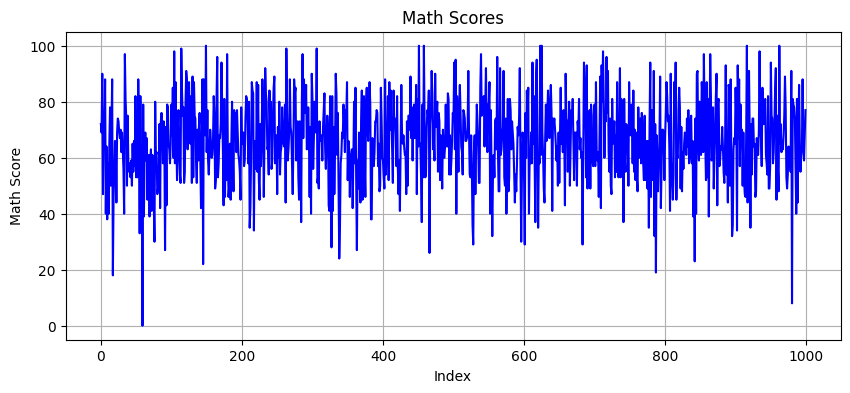

In [14]:
plt.figure(figsize=(10, 4)) 
plt.plot(df["math score"], color="blue")
plt.xlabel("Index")
plt.ylabel("Math Score")
plt.title("Math Scores")
plt.grid(True)

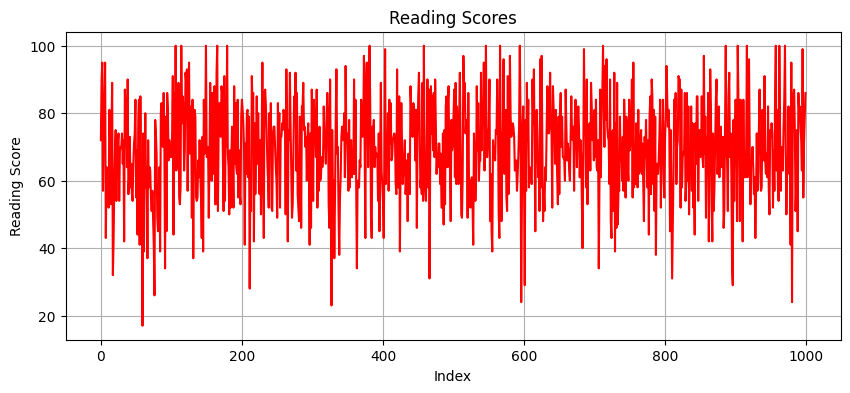

In [16]:
plt.figure(figsize=(10, 4)) 
plt.plot(df["reading score"], color="red")
plt.xlabel("Index")
plt.ylabel("Reading Score")
plt.title("Reading Scores")
plt.grid(True)

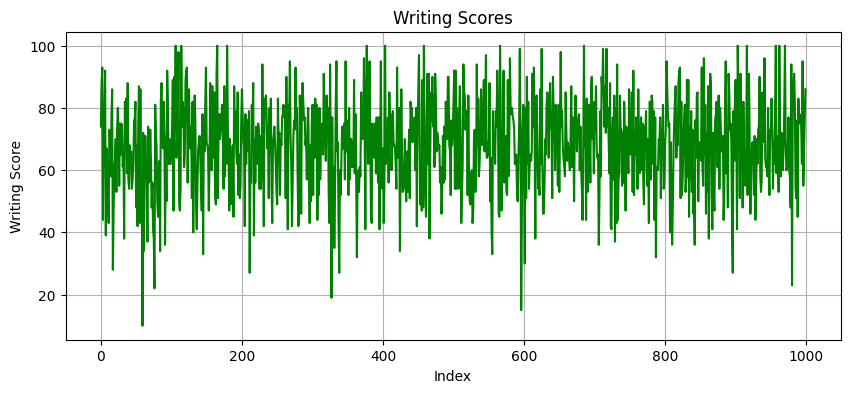

In [17]:
plt.figure(figsize=(10, 4)) 
plt.plot(df["writing score"], color="green")
plt.xlabel("Index")
plt.ylabel("Writing Score")
plt.title("Writing Scores")
plt.grid(True)

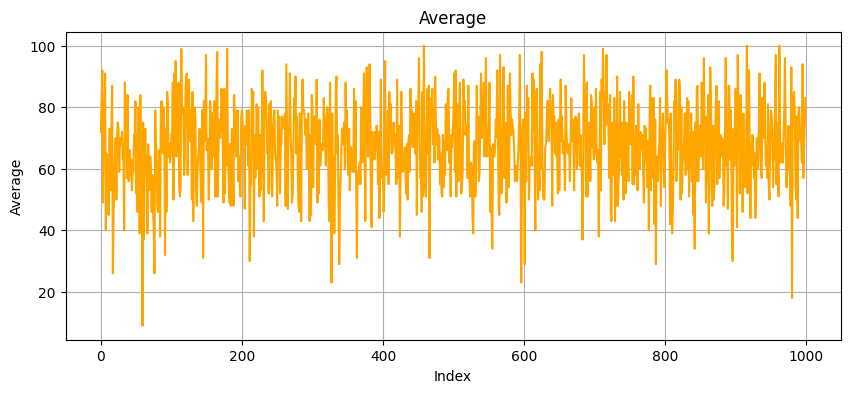

In [18]:
plt.figure(figsize=(10, 4)) 
plt.plot(df["average"], color="orange")
plt.xlabel("Index")
plt.ylabel("Average")
plt.title("Average")
plt.grid(True)

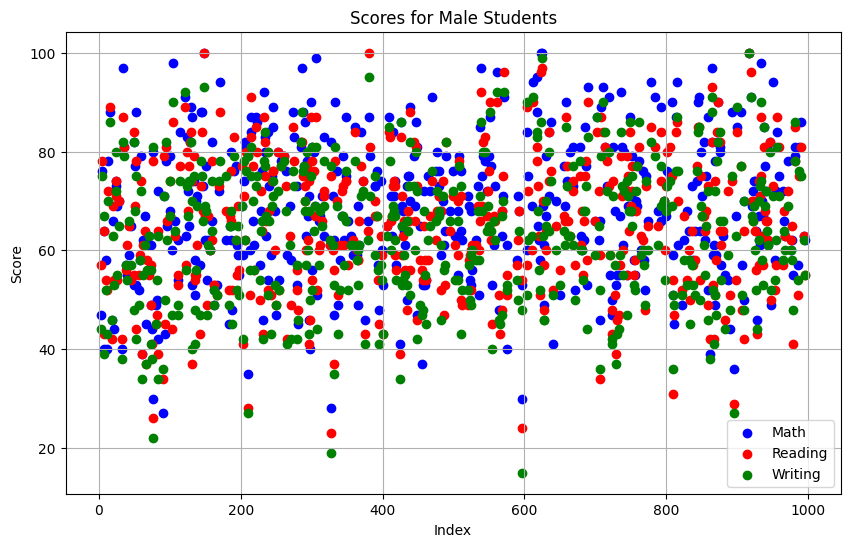

In [19]:
male_students = df[df["gender"] == "male"]

plt.figure(figsize=(10, 6))
plt.scatter(male_students.index, male_students["math score"], color="blue", label="Math")
plt.scatter(male_students.index, male_students["reading score"], color="red", label="Reading")
plt.scatter(male_students.index, male_students["writing score"], color="green", label="Writing")
plt.xlabel("Index")
plt.ylabel("Score")
plt.title("Scores for Male Students")
plt.legend()
plt.grid(True)

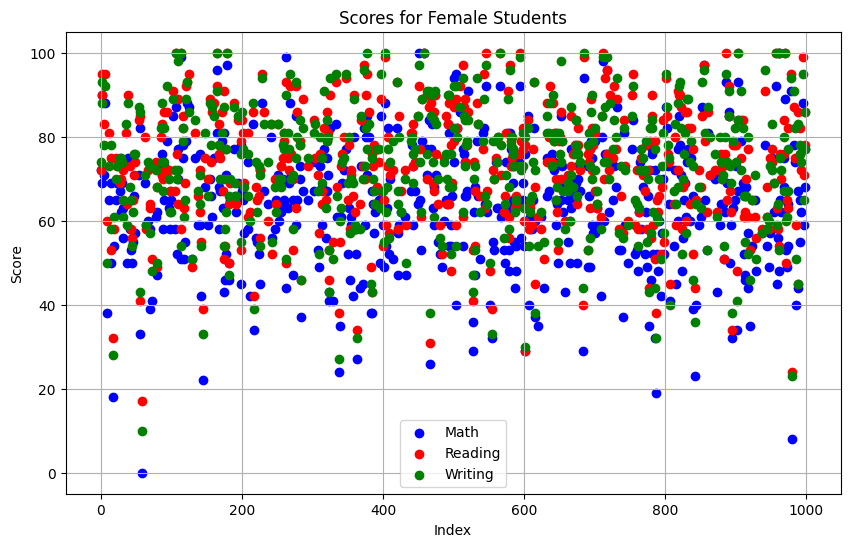

In [20]:
female_students = df[df["gender"] == "female"]

plt.figure(figsize=(10, 6))
plt.scatter(female_students.index, female_students["math score"], color="blue", label="Math")
plt.scatter(female_students.index, female_students["reading score"], color="red", label="Reading")
plt.scatter(female_students.index, female_students["writing score"], color="green", label="Writing")
plt.xlabel("Index")
plt.ylabel("Score")
plt.title("Scores for Female Students")
plt.legend()
plt.grid(True)

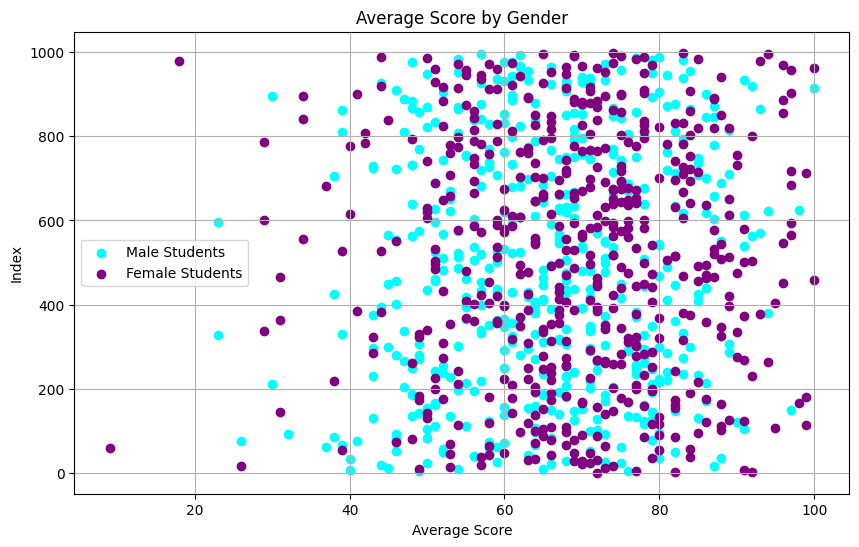

In [21]:
plt.figure(figsize=(10, 6))  
plt.scatter(male_students["average"], male_students.index, color="cyan", label="Male Students")
plt.scatter(female_students["average"], female_students.index, color="purple", label="Female Students")
plt.xlabel("Average Score")
plt.ylabel("Index")
plt.title("Average Score by Gender")
plt.legend()
plt.grid(True)
plt.show()

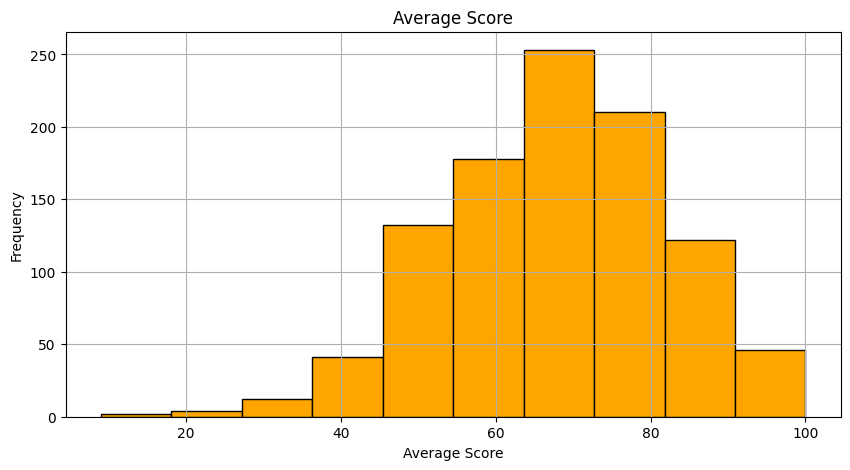

In [22]:
plt.figure(figsize=(10, 5)) 
plt.hist(df["average"], bins=10, color="orange", edgecolor="black")
plt.xlabel("Average Score")
plt.ylabel("Frequency")
plt.title("Average Score")
plt.grid(True)

(-1.0999981144254933,
 1.099998112680991,
 -1.0999976882955929,
 1.099995937228896)

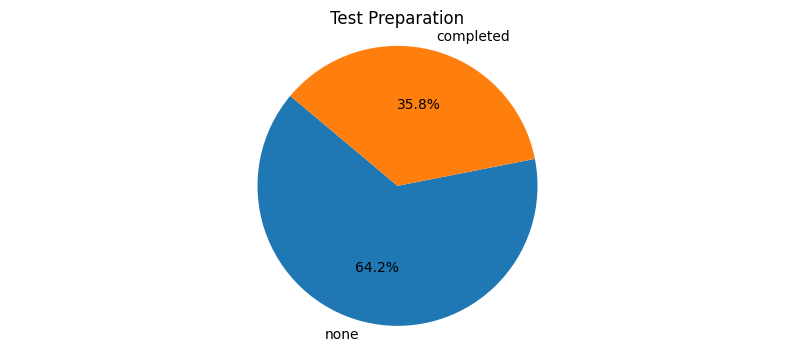

In [23]:
test_prep_counts = df["test preparation course"].value_counts(normalize=True)

plt.figure(figsize=(10, 4))
plt.pie(test_prep_counts, labels=test_prep_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Test Preparation")
plt.axis("equal") 

(-1.0999980886357041,
 1.0999978930948178,
 -1.0999976522709611,
 1.0999962005384298)

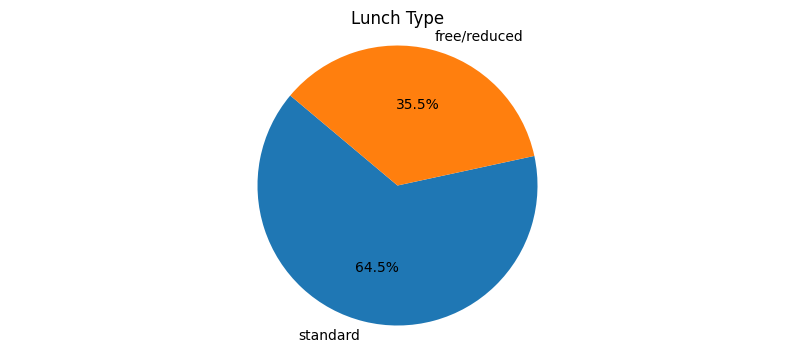

In [24]:
lunch_counts = df["lunch"].value_counts(normalize=True)

plt.figure(figsize=(10, 4))
plt.pie(lunch_counts, labels=lunch_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Lunch Type")
plt.axis("equal") 

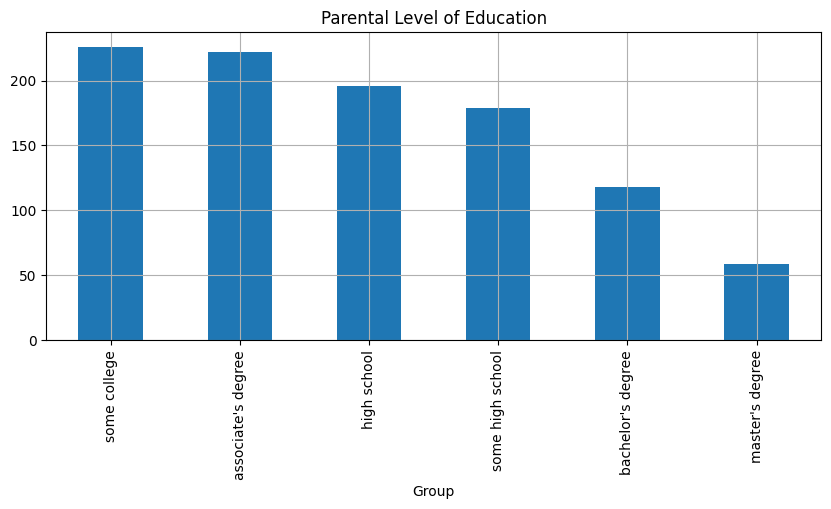

In [67]:
plt.subplots(figsize=(10,4))
df["parental level of education"].value_counts(normalize = True)
df["parental level of education"].value_counts(dropna = False).plot.bar()
plt.title("Parental Level of Education")
plt.xlabel("Group")
plt.grid(True)

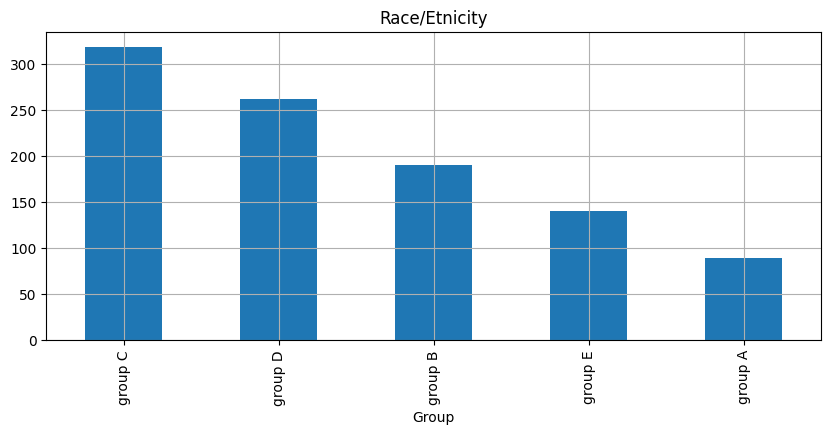

In [68]:
plt.subplots(figsize=(10,4))
df["race/ethnicity"].value_counts(normalize = True)
df["race/ethnicity"].value_counts(dropna = False).plot.bar()
plt.title("Race/Etnicity")
plt.xlabel("Group")
plt.grid(True)

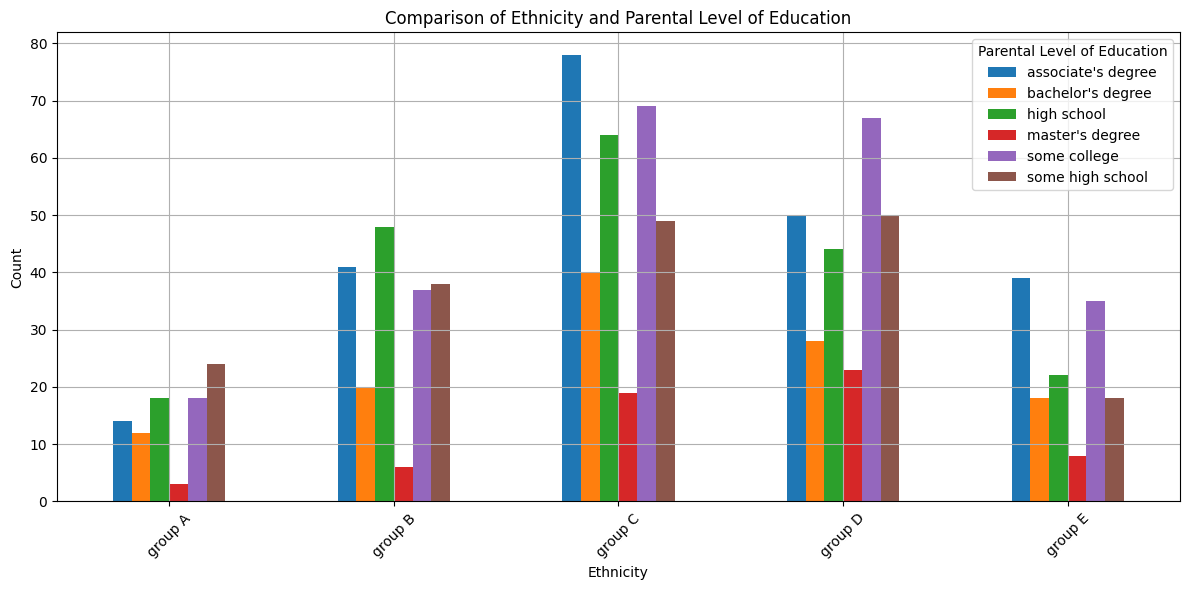

In [27]:
grouped = df.groupby(["race/ethnicity", "parental level of education"]).size().unstack()

grouped.plot(kind="bar", figsize=(12, 6))
plt.title("Comparison of Ethnicity and Parental Level of Education")
plt.xlabel("Ethnicity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Parental Level of Education")
plt.grid(True)
plt.tight_layout()
plt.show()

array([[<Axes: xlabel='math score', ylabel='math score'>,
        <Axes: xlabel='reading score', ylabel='math score'>,
        <Axes: xlabel='writing score', ylabel='math score'>,
        <Axes: xlabel='total score', ylabel='math score'>,
        <Axes: xlabel='average', ylabel='math score'>],
       [<Axes: xlabel='math score', ylabel='reading score'>,
        <Axes: xlabel='reading score', ylabel='reading score'>,
        <Axes: xlabel='writing score', ylabel='reading score'>,
        <Axes: xlabel='total score', ylabel='reading score'>,
        <Axes: xlabel='average', ylabel='reading score'>],
       [<Axes: xlabel='math score', ylabel='writing score'>,
        <Axes: xlabel='reading score', ylabel='writing score'>,
        <Axes: xlabel='writing score', ylabel='writing score'>,
        <Axes: xlabel='total score', ylabel='writing score'>,
        <Axes: xlabel='average', ylabel='writing score'>],
       [<Axes: xlabel='math score', ylabel='total score'>,
        <Axes: xlabel='rea

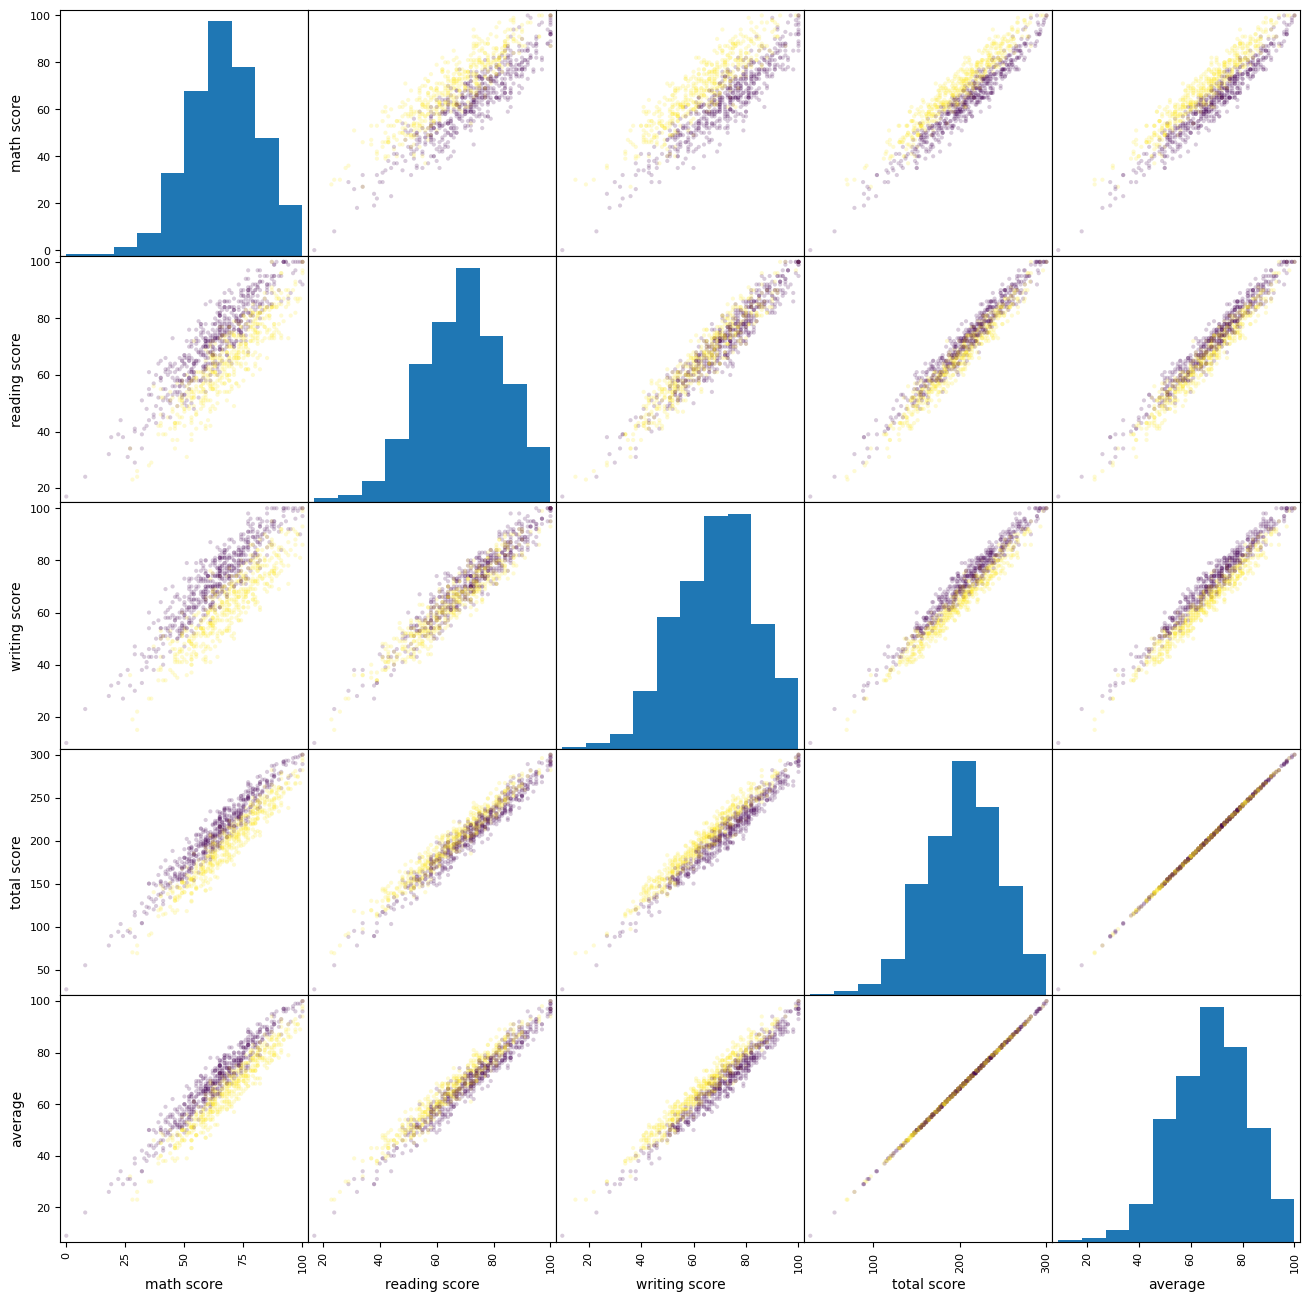

In [25]:
pd.plotting.scatter_matrix(df_encoded.iloc[:, -5:], alpha=0.2, figsize=(16,16), c=df_encoded["gender"])

In [28]:
df_encoded.keys()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total score', 'average'],
      dtype='object')

In [28]:
X = df_encoded[["parental level of education", "gender", "race/ethnicity" ]]
Y = df_encoded[["test preparation course" ]]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Printing the shapes of the training and testing sets to verify the split
print("Train data shape: {}".format(X_train.shape))
print("Train target shape: {}".format(y_train.shape))
print("Test data shape: {}".format(X_test.shape))
print("Test target shape: {}".format(y_test.shape))

Train data shape: (800, 3)
Train target shape: (800, 1)
Test data shape: (200, 3)
Test target shape: (200, 1)


## Linear Classifiers

===============Logistic Regression================
Train Accuracy: 0.65125
Test Accuracy: 0.605
Train Accuracy: 0.6512, Train F1 Score: 0.7888
Test Accuracy: 0.6050, Test F1 Score: 0.7539


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


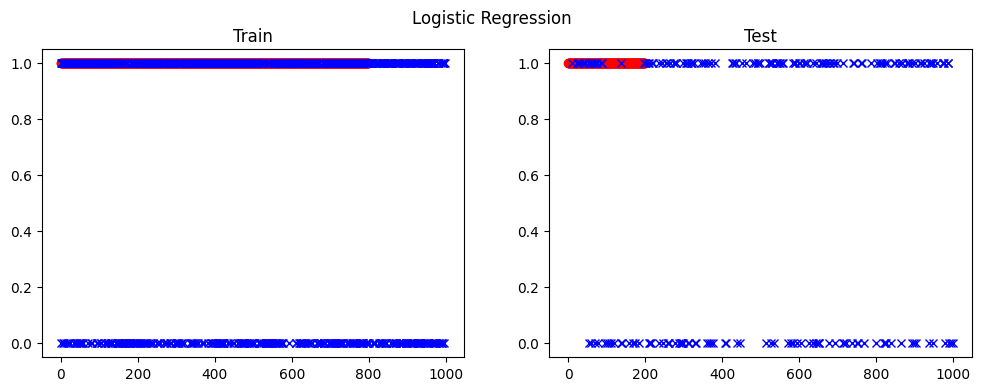

=======================kNN========================
Train Accuracy: 0.63625
Test Accuracy: 0.595
Train Accuracy: 0.6362, Train F1 Score: 0.7418
Test Accuracy: 0.5950, Test F1 Score: 0.7158


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


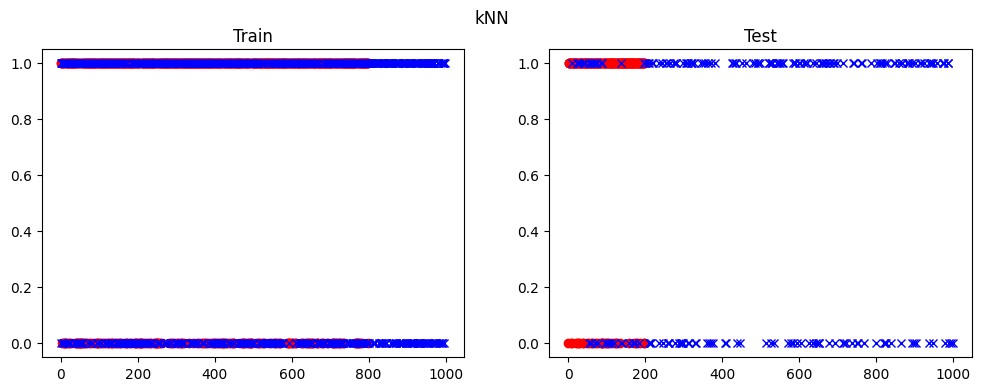

===================Naive Bayes====================
Train Accuracy: 0.65125
Test Accuracy: 0.605
Train Accuracy: 0.6512, Train F1 Score: 0.7888
Test Accuracy: 0.6050, Test F1 Score: 0.7539


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


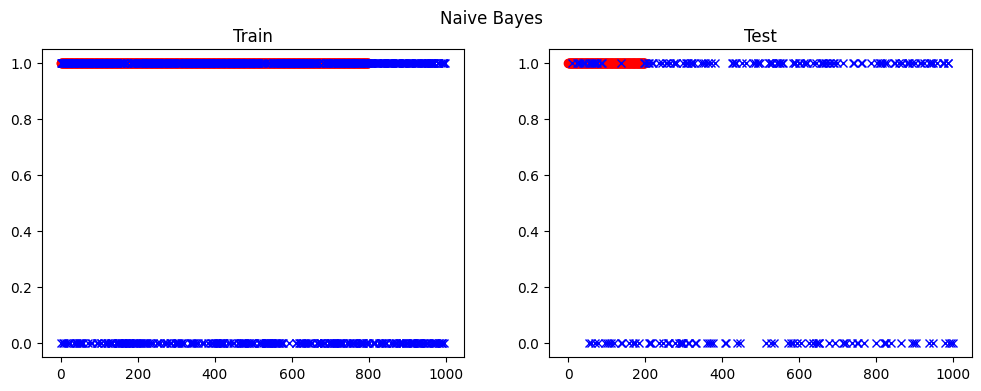

In [30]:
clfs = [LogisticRegression(), KNeighborsClassifier(), GaussianNB()]

names = ["Logistic Regression", "kNN", "Naive Bayes"]

for name, clf in zip(names, clfs):
    print("{:=^50s}".format(name))
    
    clf.fit(X_train, y_train)
    
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)    
    print(f"Train Accuracy: {train_score}\nTest Accuracy: {test_score}")
    
    train_predictions = clf.predict(X_train)
    test_predictions = clf.predict(X_test)

        # Calculate F1 scores
    train_f1 = f1_score(y_train, train_predictions)
    test_f1 = f1_score(y_test, test_predictions)
    
    # Print accuracy and F1 scores
    print(f"Train Accuracy: {train_score:.4f}, Train F1 Score: {train_f1:.4f}")
    print(f"Test Accuracy: {test_score:.4f}, Test F1 Score: {test_f1:.4f}")
    
    plt.figure(figsize=(12,4))
    
    plt.subplot(121)
    plt.plot(train_predictions, 'ro')
    plt.plot(y_train, 'bx')
    plt.title("Train")
    
    plt.subplot(122)
    plt.plot(test_predictions, 'ro')
    plt.plot(y_test, 'bx')
    plt.title("Test")
    
    plt.suptitle(name)
    plt.show()
    

   

In [124]:
logreg = Pipeline ( [
    ("scaler", StandardScaler ()),
    ("logreg", GaussianNB())
] )

scores = cross_val_score (logreg, X_train, y_train, cv=10)

print(u"CV Error: {:.3f} \u00B1 {:.3f}".format(scores.mean(), scores.std()))
    

CV Error: 0.660 ± 0.037


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/uti

In [125]:
logreg = Pipeline ( [
    ("scaler", StandardScaler ()),
    ("logreg", KNeighborsClassifier())
] )

scores = cross_val_score (logreg, X_train, y_train, cv=10)

print(u"CV Error: {:.3f} \u00B1 {:.3f}".format(scores.mean(), scores.std()))
    

CV Error: 0.636 ± 0.055


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighb

In [126]:
logreg = Pipeline ( [
    ("scaler", StandardScaler ()),
    ("logreg", LogisticRegression (random_state=0))
] )

scores = cross_val_score (logreg, X_train, y_train, cv=10)

print(u"CV Error: {:.3f} \u00B1 {:.3f}".format(scores.mean(), scores.std()))

CV Error: 0.660 ± 0.037


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/uti

## Decision Tree

In [31]:
X = df_encoded.drop(["math score", "writing score", "reading score", "average" ], axis=1)
Y = df_encoded[["average" ]]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Printing the shapes of the training and testing sets to verify the split
print("Train data shape: {}".format(X_train.shape))
print("Train target shape: {}".format(y_train.shape))
print("Test data shape: {}".format(X_test.shape))
print("Test target shape: {}".format(y_test.shape))

Train data shape: (800, 6)
Train target shape: (800, 1)
Test data shape: (200, 6)
Test target shape: (200, 1)


In [34]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [35]:
def evaluation_report(model, data):
   
    X_train, X_test, t_train, t_test = data
    
    train_score = model.score(X_train, t_train)
    test_score = model.score(X_test, t_test)
        
    return train_score, test_score

data = (X_train, X_test, y_train, y_test)
train_score, test_score = evaluation_report(clf, data)
print(f"Train Accuracy: {train_score}\nTest Accuracy: {test_score}\n")

Train Accuracy: 1.0
Test Accuracy: 0.97



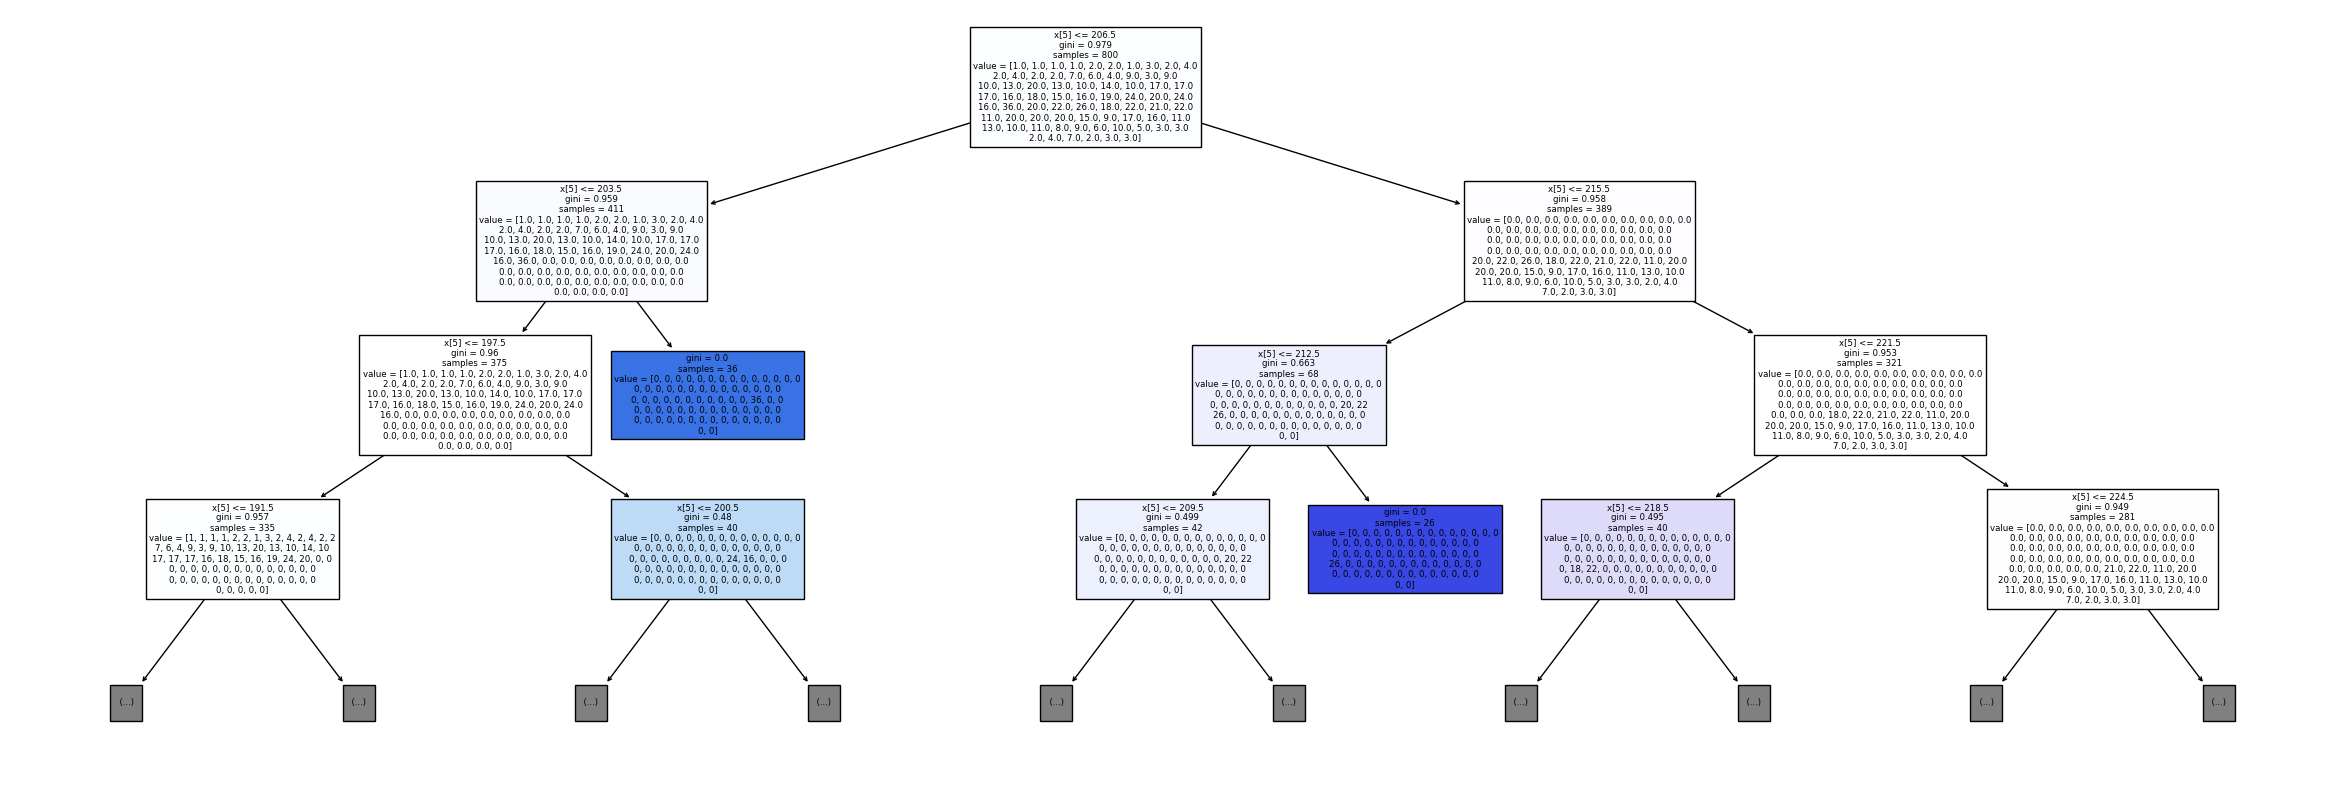

In [132]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30,10))

treeplot = plot_tree(clf, filled=True, max_depth=3)